In [29]:
import numpy as np
import scipy
from scipy import linalg
from matplotlib import pyplot as plt

X = np.array([[0.0, 1.0], [1.0, 0.0]])
Z = np.array([[1.0, 0.0], [0.0, -1.0]])
I = np.array([[1.0, 0.0], [0.0, 1.0]])

H_p = (-1/2)*(2 - np.kron(Z, np.kron(Z, I)) - np.kron(I, np.kron(Z, Z)))#hard change; Problem Hamiltonian
H_d = np.kron(X, np.kron(I, I)) + np.kron(I, np.kron(X, I)) + np.kron(I, np.kron(I, X))#simple change; Driver Hamiltonian

eigenValues, eigenVectors = np.linalg.eig(H_d)
idx = np.argsort(eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

psi_0 = eigenVectors[0] #Initial psi
dt = 0.042 #Time step
U_p = linalg.expm(-1j*H_p*dt) #Unitary for Problem
comm = 1j*(H_d @ H_p - H_p @ H_d) #Commutator for Hamiltonians
n_steps = 100 #Number of steps
beta = [0] #Empty array to store betas with the 0th element being 0
success_probability = []
cost_function = [float(np.real(np.conj(np.transpose(psi_0)) @ H_p @ psi_0))]#

U_d = linalg.expm(-1j*beta[0]*H_d*dt) #Unitary for Driver
psi = U_d @ U_p @ psi_0 #Create psi with initial psi
A = float(np.real(np.conj(np.transpose(psi)) @ comm @ psi))
beta.append(-A) #Add -A to beta array
cost_function.append(float(np.real(np.conj(np.transpose(psi)) @ H_p @ psi)))#

i = 1 #Already set the first layer, this is for each layer after
while i < n_steps:
    U_d = linalg.expm(-1j*beta[i]*H_d*dt) #Create Unitary Driver
    psi = U_d @ U_p @ psi #Create psi
    A = float((np.real(np.conj(np.transpose(psi)) @ comm @ psi)))#Estimate A
    beta.append(-A) #Add -A to beta array
    cost_function.append(float(np.real(np.conj(np.transpose(psi)) @ H_p @ psi)))#
    i = i+1 #increment i

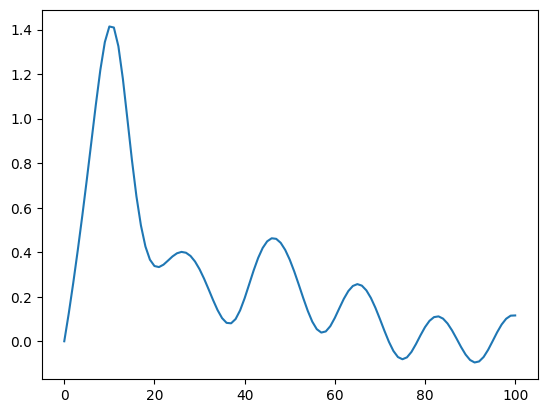

In [30]:
plt.plot(beta)
plt.show()

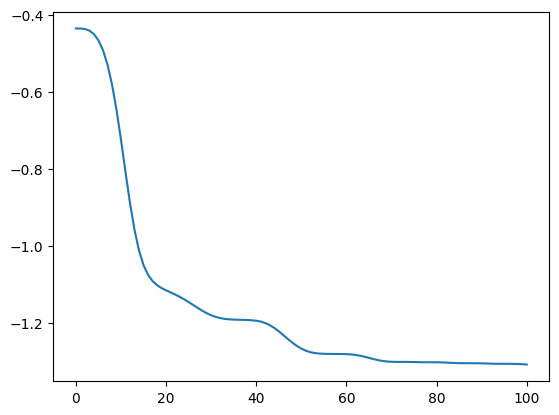

In [31]:
plt.plot(cost_function)
plt.show()

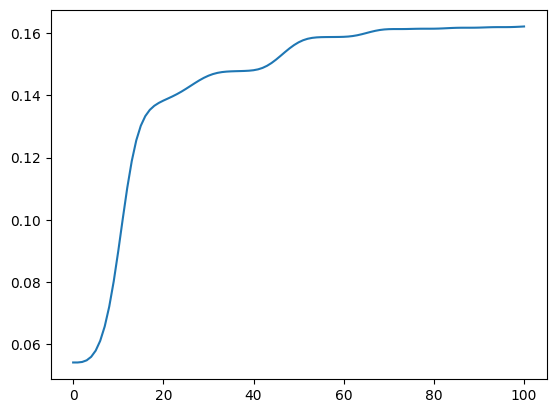

In [32]:
H_p_min = min(np.linalg.eig(H_p)[0])
approximation_ratio = []
for i in range(len(cost_function)):
    value = (cost_function[i])/H_p_min
    approximation_ratio.append(value)
plt.plot(approximation_ratio)
plt.show()

In [28]:
phi = 0.0
phi_mean = 0.0
phi_list = []
initial_qubit = np.eye(psi[0].shape[0], dtype = 'complex128')
for x in range(len(psi)):
    psi_x = psi[x]
    phi = 0.0
    qubit = (initial_qubit)
    for i in H_p_argmin:
        phi = phi + (np.absolute(np.vdot(psi_x, qubit[:,i])))**2
        phi_mean = phi_mean + (np.absolute(np.vdot(psi_x, qubit[:,i])))**2
    phi_list.append(phi)
phi_mean = phi_mean/len(psi)
plt.plot(success_probability)
plot.show()

8
